## 02. Analsis Seoul Crime

In [1]:
import pandas as pd
import numpy as np

In [2]:
# 데이터 읽기
crime_raw_data = pd.read_csv("./Crime_data/02. crime_in_Seoul.csv", thousands= "," , encoding="euc-kr")
crime_raw_data.head()

,구분,죄종,발생검거,건수
0,중부,살인,발생,2.0
1,중부,살인,검거,2.0
2,중부,강도,발생,3.0
3,중부,강도,검거,3.0
4,중부,강간,발생,141.0


In [3]:
crime_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65534 entries, 0 to 65533
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구분      310 non-null    object 
 1   죄종      310 non-null    object 
 2   발생검거    310 non-null    object 
 3   건수      310 non-null    float64
dtypes: float64(1), object(3)
memory usage: 2.0+ MB


In [4]:
crime_raw_data["죄종"].unique()

array(['살인', '강도', '강간', '절도', '폭력', nan], dtype=object)

In [5]:
crime_raw_data[crime_raw_data["죄종"].isnull()].head()

,구분,죄종,발생검거,건수
310,NaN,NaN,NaN,NaN
311,NaN,NaN,NaN,NaN
312,NaN,NaN,NaN,NaN
313,NaN,NaN,NaN,NaN
314,NaN,NaN,NaN,NaN


In [6]:
crime_raw_data = crime_raw_data[crime_raw_data["죄종"].notnull()]

In [7]:
crime_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 310 entries, 0 to 309
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구분      310 non-null    object 
 1   죄종      310 non-null    object 
 2   발생검거    310 non-null    object 
 3   건수      310 non-null    float64
dtypes: float64(1), object(3)
memory usage: 12.1+ KB


In [8]:
crime_raw_data.head()

,구분,죄종,발생검거,건수
0,중부,살인,발생,2.0
1,중부,살인,검거,2.0
2,중부,강도,발생,3.0
3,중부,강도,검거,3.0
4,중부,강간,발생,141.0


In [9]:
crime_raw_data.tail()

,구분,죄종,발생검거,건수
305,수서,강간,검거,144.0
306,수서,절도,발생,1149.0
307,수서,절도,검거,789.0
308,수서,폭력,발생,1666.0
309,수서,폭력,검거,1431.0


## Pandas pivot table
- index,columns,values,aggfunc


In [10]:
df = pd.read_excel("./Crime_data/02. sales-funnel.xlsx",engine="openpyxl")
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


index 설정

In [11]:
# Name 컬럼을 인덱스로 설정
# pd.pivot_table(df, index='Name', values=['Account','Quantity', 'Price'])
df.pivot_table(index="Name",values=['Account','Quantity', 'Price'])

,Account,Price,Quantity
Name,,,
Barton LLC,740150,35000,1.000000
"Fritsch, Russel and Anderson",737550,35000,1.000000
Herman LLC,141962,65000,2.000000
Jerde-Hilpert,412290,5000,2.000000
"Kassulke, Ondricka and Metz",307599,7000,3.000000
Keeling LLC,688981,100000,5.000000
Kiehn-Spinka,146832,65000,2.000000
Koepp Ltd,729833,35000,2.000000
Kulas Inc,218895,25000,1.500000


In [12]:
# 멀티 인덱스 설정
df.pivot_table(index=["Name","Manager","Rep"],values=['Account','Quantity', 'Price'])

,,,Account,Price,Quantity
Name,Manager,Rep,,,
Barton LLC,Debra Henley,John Smith,740150,35000,1.000000
"Fritsch, Russel and Anderson",Debra Henley,Craig Booker,737550,35000,1.000000
Herman LLC,Fred Anderson,Cedric Moss,141962,65000,2.000000
Jerde-Hilpert,Debra Henley,John Smith,412290,5000,2.000000
"Kassulke, Ondricka and Metz",Fred Anderson,Wendy Yule,307599,7000,3.000000
Keeling LLC,Fred Anderson,Wendy Yule,688981,100000,5.000000
Kiehn-Spinka,Debra Henley,Daniel Hilton,146832,65000,2.000000
Koepp Ltd,Fred Anderson,Wendy Yule,729833,35000,2.000000
Kulas Inc,Debra Henley,Daniel Hilton,218895,25000,1.500000


In [13]:
df.pivot_table(index=["Name","Manager","Rep"],values="Price")

,,,Price
Name,Manager,Rep,
Barton LLC,Debra Henley,John Smith,35000
"Fritsch, Russel and Anderson",Debra Henley,Craig Booker,35000
Herman LLC,Fred Anderson,Cedric Moss,65000
Jerde-Hilpert,Debra Henley,John Smith,5000
"Kassulke, Ondricka and Metz",Fred Anderson,Wendy Yule,7000
Keeling LLC,Fred Anderson,Wendy Yule,100000
Kiehn-Spinka,Debra Henley,Daniel Hilton,65000
Koepp Ltd,Fred Anderson,Wendy Yule,35000
Kulas Inc,Debra Henley,Daniel Hilton,25000


In [14]:
# Price 컬럼 sum 연산 적용
df.pivot_table(index=["Name","Manager","Rep"],values="Price",aggfunc=np.sum)

,,,Price
Name,Manager,Rep,
Barton LLC,Debra Henley,John Smith,35000
"Fritsch, Russel and Anderson",Debra Henley,Craig Booker,35000
Herman LLC,Fred Anderson,Cedric Moss,65000
Jerde-Hilpert,Debra Henley,John Smith,5000
"Kassulke, Ondricka and Metz",Fred Anderson,Wendy Yule,7000
Keeling LLC,Fred Anderson,Wendy Yule,100000
Kiehn-Spinka,Debra Henley,Daniel Hilton,65000
Koepp Ltd,Fred Anderson,Wendy Yule,70000
Kulas Inc,Debra Henley,Daniel Hilton,50000


In [15]:
df.pivot_table(index=["Name","Manager","Rep"],values="Price",aggfunc=[np.sum,len])

,,,sum,len
,,,Price,Price
Name,Manager,Rep,,
Barton LLC,Debra Henley,John Smith,35000,1
"Fritsch, Russel and Anderson",Debra Henley,Craig Booker,35000,1
Herman LLC,Fred Anderson,Cedric Moss,65000,1
Jerde-Hilpert,Debra Henley,John Smith,5000,1
"Kassulke, Ondricka and Metz",Fred Anderson,Wendy Yule,7000,1
Keeling LLC,Fred Anderson,Wendy Yule,100000,1
Kiehn-Spinka,Debra Henley,Daniel Hilton,65000,1
Koepp Ltd,Fred Anderson,Wendy Yule,70000,2


columns 설정

In [16]:
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


In [17]:
df.pivot_table(index=["Name","Manager","Rep"],values="Price",columns="Product",aggfunc=np.sum)

,,Product,CPU,Maintenance,Monitor,Software
Name,Manager,Rep,,,,
Barton LLC,Debra Henley,John Smith,35000.0,NaN,NaN,NaN
"Fritsch, Russel and Anderson",Debra Henley,Craig Booker,35000.0,NaN,NaN,NaN
Herman LLC,Fred Anderson,Cedric Moss,65000.0,NaN,NaN,NaN
Jerde-Hilpert,Debra Henley,John Smith,NaN,5000.0,NaN,NaN
"Kassulke, Ondricka and Metz",Fred Anderson,Wendy Yule,NaN,7000.0,NaN,NaN
Keeling LLC,Fred Anderson,Wendy Yule,100000.0,NaN,NaN,NaN
Kiehn-Spinka,Debra Henley,Daniel Hilton,65000.0,NaN,NaN,NaN
Koepp Ltd,Fred Anderson,Wendy Yule,65000.0,NaN,5000.0,NaN
Kulas Inc,Debra Henley,Daniel Hilton,40000.0,NaN,NaN,10000.0


In [18]:
# Nan 값 설정 : fill_value
df.pivot_table(index=["Name","Manager","Rep"],values="Price",columns="Product",aggfunc=np.sum,fill_value=0)

,,Product,CPU,Maintenance,Monitor,Software
Name,Manager,Rep,,,,
Barton LLC,Debra Henley,John Smith,35000,0,0,0
"Fritsch, Russel and Anderson",Debra Henley,Craig Booker,35000,0,0,0
Herman LLC,Fred Anderson,Cedric Moss,65000,0,0,0
Jerde-Hilpert,Debra Henley,John Smith,0,5000,0,0
"Kassulke, Ondricka and Metz",Fred Anderson,Wendy Yule,0,7000,0,0
Keeling LLC,Fred Anderson,Wendy Yule,100000,0,0,0
Kiehn-Spinka,Debra Henley,Daniel Hilton,65000,0,0,0
Koepp Ltd,Fred Anderson,Wendy Yule,65000,0,5000,0
Kulas Inc,Debra Henley,Daniel Hilton,40000,0,0,10000


In [19]:
# 2개 이상 index,values 설정
df.pivot_table(index=["Product","Manager","Rep"],values=["Price","Quantity"],aggfunc=np.sum,fill_value=0)

Price  Quantity
Product     Manager       Rep                            
CPU         Debra Henley  Craig Booker    65000         2
                          Daniel Hilton  105000         4
                          John Smith      35000         1
            Fred Anderson Cedric Moss     95000         3
                          Wendy Yule     165000         7
Maintenance Debra Henley  Craig Booker     5000         2
                          John Smith       5000         2
            Fred Anderson Cedric Moss      5000         1
                          Wendy Yule       7000         3
Monitor     Fred Anderson Wendy Yule       5000         2
Software    Debra Henley  Craig Booker    10000         1
                          Daniel Hilton   10000         1
            Fred Anderson Cedric Moss     10000         1

In [20]:
# aggfunc 2개 이상 설정
df.pivot_table(index=["Product","Manager","Rep"],
               values=["Price","Quantity"],
               aggfunc=[np.sum,np.mean],
               fill_value=0,
               margins=True)

sum                   mean  \
                                          Price Quantity         Price   
Product     Manager       Rep                                            
CPU         Debra Henley  Craig Booker    65000        2  32500.000000   
                          Daniel Hilton  105000        4  52500.000000   
                          John Smith      35000        1  35000.000000   
            Fred Anderson Cedric Moss     95000        3  47500.000000   
                          Wendy Yule     165000        7  82500.000000   
Maintenance Debra Henley  Craig Booker     5000        2   5000.000000   
                          John Smith       5000        2   5000.000000   
            Fred Anderson Cedric Moss      5000        1   5000.000000   
                          Wendy Yule       7000        3   7000.000000   
Monitor     Fred Anderson Wendy Yule       5000        2   5000.000000   
Software    Debra Henley  Craig Booker    10000        1  10000.000000   
                          Daniel Hilton   10000        1  10000.000000   
            Fred Anderson Cedric Moss     10000        1  10000.000000   
All                                      522000       30  30705.882353   

                                                   
                                         Quantity  
Product     Manager       Rep                      
CPU         Debra Henley  Craig Booker   1.000000  
                          Daniel Hilton  2.000000  
                          John Smith     1.000000  
            Fred Anderson Cedric Moss    1.500000  
                          Wendy Yule     3.500000  
Maintenance Debra Henley  Craig Booker   2.000000  
                          John Smith     2.000000  
            Fred Anderson Cedric Moss    1.000000  
                          Wendy Yule     3.000000  
Monitor     Fred Anderson Wendy Yule     2.000000  
Software    Debra Henley  Craig Booker   1.000000  
                          Daniel Hilton  1.000000  
            Fred Anderson Cedric Moss    1.000000  
All                                      1.764706

------------

---

## 3. 서울시 범죄 현황 데이터 정리

In [21]:
crime_raw_data.head()

,구분,죄종,발생검거,건수
0,중부,살인,발생,2.0
1,중부,살인,검거,2.0
2,중부,강도,발생,3.0
3,중부,강도,검거,3.0
4,중부,강간,발생,141.0


In [22]:
crime_station = crime_raw_data.pivot_table(
    crime_raw_data,
    index="구분",
    columns=["죄종","발생검거"],
    aggfunc=[np.sum]
)
crime_station.head()

sum                                                              
         건수                                                              
죄종       강간           강도          살인           절도              폭력        
발생검거     검거     발생    검거    발생    검거   발생      검거      발생      검거      발생
구분                                                                       
강남    269.0  339.0  26.0  24.0   3.0  3.0  1129.0  2438.0  2096.0  2336.0
강동    152.0  160.0  13.0  14.0   5.0  4.0   902.0  1754.0  2201.0  2530.0
강북    159.0  217.0   4.0   5.0   6.0  7.0   672.0  1222.0  2482.0  2778.0
강서    239.0  275.0  10.0  10.0  10.0  9.0  1070.0  1952.0  2768.0  3204.0
관악    264.0  322.0  10.0  12.0   7.0  6.0   937.0  2103.0  2707.0  3235.0

In [23]:
crime_station.columns # Multiindex

MultiIndex([('sum', '건수', '강간', '검거'),
            ('sum', '건수', '강간', '발생'),
            ('sum', '건수', '강도', '검거'),
            ('sum', '건수', '강도', '발생'),
            ('sum', '건수', '살인', '검거'),
            ('sum', '건수', '살인', '발생'),
            ('sum', '건수', '절도', '검거'),
            ('sum', '건수', '절도', '발생'),
            ('sum', '건수', '폭력', '검거'),
            ('sum', '건수', '폭력', '발생')],
           names=[None, None, '죄종', '발생검거'])

In [24]:
crime_station["sum","건수","강도","검거"][:5]

구분
강남    26.0
강동    13.0
강북     4.0
강서    10.0
관악    10.0
Name: (sum, 건수, 강도, 검거), dtype: float64

In [25]:
crime_station.columns = crime_station.columns.droplevel([0,1]) # 다중 컬럼에서 특정 컬럼 제거
crime_station.columns

MultiIndex([('강간', '검거'),
            ('강간', '발생'),
            ('강도', '검거'),
            ('강도', '발생'),
            ('살인', '검거'),
            ('살인', '발생'),
            ('절도', '검거'),
            ('절도', '발생'),
            ('폭력', '검거'),
            ('폭력', '발생')],
           names=['죄종', '발생검거'])

In [26]:
crime_station.head()

죄종       강간           강도          살인           절도              폭력        
발생검거     검거     발생    검거    발생    검거   발생      검거      발생      검거      발생
구분                                                                       
강남    269.0  339.0  26.0  24.0   3.0  3.0  1129.0  2438.0  2096.0  2336.0
강동    152.0  160.0  13.0  14.0   5.0  4.0   902.0  1754.0  2201.0  2530.0
강북    159.0  217.0   4.0   5.0   6.0  7.0   672.0  1222.0  2482.0  2778.0
강서    239.0  275.0  10.0  10.0  10.0  9.0  1070.0  1952.0  2768.0  3204.0
관악    264.0  322.0  10.0  12.0   7.0  6.0   937.0  2103.0  2707.0  3235.0

In [27]:
crime_station.index

Index(['강남', '강동', '강북', '강서', '관악', '광진', '구로', '금천', '남대문', '노원', '도봉',
       '동대문', '동작', '마포', '방배', '서대문', '서부', '서초', '성동', '성북', '송파', '수서',
       '양천', '영등포', '용산', '은평', '종로', '종암', '중랑', '중부', '혜화'],
      dtype='object', name='구분')

- 현재 index는 경찰서 이름으로 되어 있습니다
- 경찰서 이름으로 구 이름을 알아내야 한다

#### 4. Python 모듈 설치

pip 명령
- python의 공식 모듈 관리자
- pip list
- pip install module_name
- pip uninstall module_name

In [28]:
# !pip list
get_ipython().system("pip list")

Package                   Version
------------------------- ------------
anyio                     4.2.0
argon2-cffi               21.3.0
argon2-cffi-bindings      21.2.0
asttokens                 2.0.5
async-lru                 2.0.4
attrs                     23.1.0
Babel                     2.11.0
backcall                  0.2.0
beautifulsoup4            4.12.2
bleach                    4.1.0
Bottleneck                1.3.7
branca                    0.7.2
Brotli                    1.0.9
certifi                   2024.2.2
cffi                      1.16.0
charset-normalizer        2.0.4
colorama                  0.4.6
comm                      0.2.1
contourpy                 1.0.5
cycler                    0.11.0
debugpy                   1.6.7
decorator                 5.1.1
defusedxml                0.7.1
et-xmlfile                1.1.0
exceptiongroup            1.2.0
executing                 0.8.3
fastjsonschema            2.16.2
folium                    0.16.0
fonttools          

conda 명령
- conda list
- conda install module_name
- conda uninstall module_name
- conda install -c channel_name module_name
    - 지정된 배포 채널에서 모듈 설치
- Windows,Mac(intel)

#### 5. Google Maps API

In [29]:
pip install python-dotenv;

Note: you may need to restart the kernel to use updated packages.


In [30]:
from dotenv import load_dotenv
import os
import googlemaps

In [31]:
load_dotenv()

True

In [32]:
API_KEY = os.getenv("API_KEY")

In [33]:
# conda install -c conda-forge googleMaps;

In [34]:
gmaps = googlemaps.Client(key=API_KEY)

In [35]:
gmaps.geocode("서울영등포경찰서",language="ko")

[{'address_components': [{'long_name': '608',
    'short_name': '608',
    'types': ['premise']},
   {'long_name': '국회대로',
    'short_name': '국회대로',
    'types': ['political', 'sublocality', 'sublocality_level_4']},
   {'long_name': '영등포구',
    'short_name': '영등포구',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': '서울특별시',
    'short_name': '서울특별시',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '150-043',
    'short_name': '150-043',
    'types': ['postal_code']}],
  'formatted_address': '대한민국 서울특별시 영등포구 국회대로 608',
  'geometry': {'location': {'lat': 37.5260441, 'lng': 126.9008091},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 37.5273930802915,
     'lng': 126.9021580802915},
    'southwest': {'lat': 37.5246951197085, 'lng': 126.8994601197085}}},
  'partial_match': True,
  'place_id': 'ChIJ1TimJLaffDURptXOs0Tj6s

In [36]:
tmp = gmaps.geocode("서울영등포경찰서", language="ko")
print(tmp[0].get("geometry")["location"]["lat"])
print(tmp[0].get("geometry")["location"]["lng"])
print(tmp[0].get("formatted_address"))

37.5260441
126.9008091
대한민국 서울특별시 영등포구 국회대로 608


In [37]:
tmp = tmp[0].get("formatted_address")
tmp.split()

['대한민국', '서울특별시', '영등포구', '국회대로', '608']

In [38]:
tmp.split()[2]

'영등포구'

In [39]:
crime_station["구별"] = np.nan
crime_station["lat"] = np.nan
crime_station["lng"] = np.nan
crime_station.head()

죄종       강간           강도          살인           절도              폭력          구별  \
발생검거     검거     발생    검거    발생    검거   발생      검거      발생      검거      발생       
구분                                                                              
강남    269.0  339.0  26.0  24.0   3.0  3.0  1129.0  2438.0  2096.0  2336.0 NaN   
강동    152.0  160.0  13.0  14.0   5.0  4.0   902.0  1754.0  2201.0  2530.0 NaN   
강북    159.0  217.0   4.0   5.0   6.0  7.0   672.0  1222.0  2482.0  2778.0 NaN   
강서    239.0  275.0  10.0  10.0  10.0  9.0  1070.0  1952.0  2768.0  3204.0 NaN   
관악    264.0  322.0  10.0  12.0   7.0  6.0   937.0  2103.0  2707.0  3235.0 NaN   

죄종   lat lng  
발생검거          
구분            
강남   NaN NaN  
강동   NaN NaN  
강북   NaN NaN  
강서   NaN NaN  
관악   NaN NaN

In [40]:
count = 0
for idx, rows in crime_station.iterrows():
    station_name = "서울" + str(idx) + "경찰서"
    tmp = gmaps.geocode(station_name,language="ko")

    tmp[0].get("formatted_address")
    tmp_gu = tmp[0].get("formatted_address")

    lat = tmp[0].get("geometry")["location"]["lat"]
    lng = tmp[0].get("geometry")["location"]["lng"]

    crime_station.loc[idx,"lat"] = lat
    crime_station.loc[idx,"lng"] = lng
    crime_station.loc[idx,"구별"] = tmp_gu.split()[2]

    print(count)
    count = count + 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


In [41]:
crime_station.head()

죄종       강간           강도          살인           절도              폭력          \
발생검거     검거     발생    검거    발생    검거   발생      검거      발생      검거      발생   
구분                                                                          
강남    269.0  339.0  26.0  24.0   3.0  3.0  1129.0  2438.0  2096.0  2336.0   
강동    152.0  160.0  13.0  14.0   5.0  4.0   902.0  1754.0  2201.0  2530.0   
강북    159.0  217.0   4.0   5.0   6.0  7.0   672.0  1222.0  2482.0  2778.0   
강서    239.0  275.0  10.0  10.0  10.0  9.0  1070.0  1952.0  2768.0  3204.0   
관악    264.0  322.0  10.0  12.0   7.0  6.0   937.0  2103.0  2707.0  3235.0   

죄종     구별        lat         lng  
발생검거                              
구분                                
강남    강남구  37.509435  127.066958  
강동    강동구  37.528511  127.126822  
강북    강북구  37.637197  127.027305  
강서    강서구  37.551362  126.850280  
관악    관악구  37.474395  126.951349

In [42]:
tmp = [
    crime_station.columns.get_level_values(0)[n]
    + crime_station.columns.get_level_values(1)[n]
    for n in range(0, len(crime_station.columns.get_level_values(0)))
]
crime_station.columns = tmp
crime_station.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,구별,lat,lng
구분,,,,,,,,,,,,,
강남,269.0,339.0,26.0,24.0,3.0,3.0,1129.0,2438.0,2096.0,2336.0,강남구,37.509435,127.066958
강동,152.0,160.0,13.0,14.0,5.0,4.0,902.0,1754.0,2201.0,2530.0,강동구,37.528511,127.126822
강북,159.0,217.0,4.0,5.0,6.0,7.0,672.0,1222.0,2482.0,2778.0,강북구,37.637197,127.027305
강서,239.0,275.0,10.0,10.0,10.0,9.0,1070.0,1952.0,2768.0,3204.0,강서구,37.551362,126.850280
관악,264.0,322.0,10.0,12.0,7.0,6.0,937.0,2103.0,2707.0,3235.0,관악구,37.474395,126.951349


In [43]:
crime_station.to_csv("./Crime_data/02. crime_in_Seoul_raw.csv", sep=",", encoding="utf-8")

In [44]:
crime_anal_station = pd.read_csv("./Crime_data/02. crime_in_Seoul_raw.csv", index_col=0,encoding="utf-8")
crime_anal_station.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,구별,lat,lng
구분,,,,,,,,,,,,,
강남,269.0,339.0,26.0,24.0,3.0,3.0,1129.0,2438.0,2096.0,2336.0,강남구,37.509435,127.066958
강동,152.0,160.0,13.0,14.0,5.0,4.0,902.0,1754.0,2201.0,2530.0,강동구,37.528511,127.126822
강북,159.0,217.0,4.0,5.0,6.0,7.0,672.0,1222.0,2482.0,2778.0,강북구,37.637197,127.027305
강서,239.0,275.0,10.0,10.0,10.0,9.0,1070.0,1952.0,2768.0,3204.0,강서구,37.551362,126.850280
관악,264.0,322.0,10.0,12.0,7.0,6.0,937.0,2103.0,2707.0,3235.0,관악구,37.474395,126.951349


In [45]:
crime_anal_gu = pd.pivot_table(crime_anal_station, index="구별",aggfunc=np.sum)
del crime_anal_gu["lat"]
del crime_anal_gu["lng"]
crime_anal_gu.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구별,,,,,,,,,,
강남구,413.0,516.0,42.0,39.0,5.0,5.0,1918.0,3587.0,3527.0,4002.0
강동구,152.0,160.0,13.0,14.0,5.0,4.0,902.0,1754.0,2201.0,2530.0
강북구,159.0,217.0,4.0,5.0,6.0,7.0,672.0,1222.0,2482.0,2778.0
강서구,239.0,275.0,10.0,10.0,10.0,9.0,1070.0,1952.0,2768.0,3204.0
관악구,264.0,322.0,10.0,12.0,7.0,6.0,937.0,2103.0,2707.0,3235.0


In [46]:
crime_anal_gu["강도검거"] / crime_anal_gu["강도발생"]

구별
강남구      1.076923
강동구      0.928571
강북구      0.800000
강서구      1.000000
관악구      0.833333
광진구      0.545455
구로구      1.300000
금천구      1.000000
노원경찰서    1.500000
도봉구      1.000000
동대문구     1.200000
동작구      1.000000
마포구      1.750000
서대문구     0.800000
서초구      0.769231
성동구      1.666667
성북구      1.000000
송파구      0.800000
양천구      1.000000
영등포구     0.736842
용산구      1.111111
은평구      0.777778
종로구      0.750000
중구       0.875000
중랑구      1.000000
dtype: float64

In [47]:
crime_anal_gu[["강도검거","살인검거"]].div(crime_anal_gu["강도발생"],axis=0)

,강도검거,살인검거
구별,,
강남구,1.076923,0.128205
강동구,0.928571,0.357143
강북구,0.800000,1.200000
강서구,1.000000,1.000000
관악구,0.833333,0.583333
광진구,0.545455,0.363636
구로구,1.300000,0.900000
금천구,1.000000,0.857143
노원경찰서,1.500000,1.000000


In [48]:
num = ["강간검거","강도검거","살인검거","절도검거","폭력검거"]
den = ["강간발생","강도발생","살인발생","절도발생","폭력발생"]

crime_anal_gu[num].div(crime_anal_gu[den].values)

,강간검거,강도검거,살인검거,절도검거,폭력검거
구별,,,,,
강남구,0.800388,1.076923,1.000000,0.534709,0.881309
강동구,0.950000,0.928571,1.250000,0.514253,0.869960
강북구,0.732719,0.800000,0.857143,0.549918,0.893449
강서구,0.869091,1.000000,1.111111,0.548156,0.863920
관악구,0.819876,0.833333,1.166667,0.445554,0.836785
광진구,0.838710,0.545455,1.000000,0.400986,0.840719
구로구,0.663004,1.300000,1.000000,0.450785,0.847029
금천구,0.817143,1.000000,1.000000,0.517405,0.887369
노원경찰서,0.893082,1.500000,1.200000,0.398492,0.844197


In [49]:
target = ["강간검거율","강도검거율","살인검거율","절도검거율","폭력검거율"]
num = ["강간검거","강도검거","살인검거","절도검거","폭력검거"]
den = ["강간발생","강도발생","살인발생","절도발생","폭력발생"]

crime_anal_gu[target] = crime_anal_gu[num].div(crime_anal_gu[den].values) * 100

In [50]:
crime_anal_gu.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,,,,,
강남구,413.0,516.0,42.0,39.0,5.0,5.0,1918.0,3587.0,3527.0,4002.0,80.038760,107.692308,100.000000,53.470867,88.130935
강동구,152.0,160.0,13.0,14.0,5.0,4.0,902.0,1754.0,2201.0,2530.0,95.000000,92.857143,125.000000,51.425314,86.996047
강북구,159.0,217.0,4.0,5.0,6.0,7.0,672.0,1222.0,2482.0,2778.0,73.271889,80.000000,85.714286,54.991817,89.344852
강서구,239.0,275.0,10.0,10.0,10.0,9.0,1070.0,1952.0,2768.0,3204.0,86.909091,100.000000,111.111111,54.815574,86.392010
관악구,264.0,322.0,10.0,12.0,7.0,6.0,937.0,2103.0,2707.0,3235.0,81.987578,83.333333,116.666667,44.555397,83.678516


In [51]:
del crime_anal_gu["강간검거"]
del crime_anal_gu["강도검거"]
del crime_anal_gu["살인검거"]
del crime_anal_gu["절도검거"]
del crime_anal_gu["폭력검거"]

In [52]:
crime_anal_gu.head()

,강간발생,강도발생,살인발생,절도발생,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,516.0,39.0,5.0,3587.0,4002.0,80.038760,107.692308,100.000000,53.470867,88.130935
강동구,160.0,14.0,4.0,1754.0,2530.0,95.000000,92.857143,125.000000,51.425314,86.996047
강북구,217.0,5.0,7.0,1222.0,2778.0,73.271889,80.000000,85.714286,54.991817,89.344852
강서구,275.0,10.0,9.0,1952.0,3204.0,86.909091,100.000000,111.111111,54.815574,86.392010
관악구,322.0,12.0,6.0,2103.0,3235.0,81.987578,83.333333,116.666667,44.555397,83.678516


In [53]:
crime_anal_gu[crime_anal_gu[target] > 100] = 100

In [54]:
crime_anal_gu.head()

,강간발생,강도발생,살인발생,절도발생,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,516.0,39.0,5.0,3587.0,4002.0,80.038760,100.000000,100.000000,53.470867,88.130935
강동구,160.0,14.0,4.0,1754.0,2530.0,95.000000,92.857143,100.000000,51.425314,86.996047
강북구,217.0,5.0,7.0,1222.0,2778.0,73.271889,80.000000,85.714286,54.991817,89.344852
강서구,275.0,10.0,9.0,1952.0,3204.0,86.909091,100.000000,100.000000,54.815574,86.392010
관악구,322.0,12.0,6.0,2103.0,3235.0,81.987578,83.333333,100.000000,44.555397,83.678516


In [55]:
crime_anal_gu.rename(
    columns={"강간발생": "강간", "강도발생": "강도", "살인발생": "살인", "절도발생": "절도", "폭력발생": "폭력"},
    inplace=True,
)
crime_anal_gu.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,516.0,39.0,5.0,3587.0,4002.0,80.038760,100.000000,100.000000,53.470867,88.130935
강동구,160.0,14.0,4.0,1754.0,2530.0,95.000000,92.857143,100.000000,51.425314,86.996047
강북구,217.0,5.0,7.0,1222.0,2778.0,73.271889,80.000000,85.714286,54.991817,89.344852
강서구,275.0,10.0,9.0,1952.0,3204.0,86.909091,100.000000,100.000000,54.815574,86.392010
관악구,322.0,12.0,6.0,2103.0,3235.0,81.987578,83.333333,100.000000,44.555397,83.678516


#### 8. 범죄 데이터 정렬을 위한 데이터 정리

In [56]:
crime_anal_gu.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,516.0,39.0,5.0,3587.0,4002.0,80.038760,100.000000,100.000000,53.470867,88.130935
강동구,160.0,14.0,4.0,1754.0,2530.0,95.000000,92.857143,100.000000,51.425314,86.996047
강북구,217.0,5.0,7.0,1222.0,2778.0,73.271889,80.000000,85.714286,54.991817,89.344852
강서구,275.0,10.0,9.0,1952.0,3204.0,86.909091,100.000000,100.000000,54.815574,86.392010
관악구,322.0,12.0,6.0,2103.0,3235.0,81.987578,83.333333,100.000000,44.555397,83.678516


In [57]:
# 정규화 : 최고값은 1, 최소값은 0
crime_anal_gu["강도"] / crime_anal_gu['강도'].max()

구별
강남구      1.000000
강동구      0.358974
강북구      0.128205
강서구      0.256410
관악구      0.307692
광진구      0.282051
구로구      0.256410
금천구      0.179487
노원경찰서    0.153846
도봉구      0.128205
동대문구     0.256410
동작구      0.179487
마포구      0.102564
서대문구     0.128205
서초구      0.333333
성동구      0.076923
성북구      0.205128
송파구      0.384615
양천구      0.179487
영등포구     0.487179
용산구      0.230769
은평구      0.230769
종로구      0.307692
중구       0.205128
중랑구      0.358974
Name: 강도, dtype: float64

In [58]:
col = ["강도","강간","살인","절도","폭력"]
crime_anal_norm = crime_anal_gu[col] / crime_anal_gu[col].max()
crime_anal_norm.head()

,강도,강간,살인,절도,폭력
구별,,,,,
강남구,1.000000,1.000000,0.384615,1.000000,1.000000
강동구,0.358974,0.310078,0.307692,0.488988,0.632184
강북구,0.128205,0.420543,0.538462,0.340675,0.694153
강서구,0.256410,0.532946,0.692308,0.544187,0.800600
관악구,0.307692,0.624031,0.461538,0.586284,0.808346


In [59]:
crime_anal_gu.head(1)

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,516.0,39.0,5.0,3587.0,4002.0,80.03876,100.0,100.0,53.470867,88.130935


In [60]:
# 검거율 추가
col2 = ["강간검거율","강도검거율","살인검거율","절도검거율","폭력검거율"]
crime_anal_norm[col2] = crime_anal_gu[col2]
crime_anal_norm.head()

,강도,강간,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,1.000000,0.384615,1.000000,1.000000,80.038760,100.000000,100.000000,53.470867,88.130935
강동구,0.358974,0.310078,0.307692,0.488988,0.632184,95.000000,92.857143,100.000000,51.425314,86.996047
강북구,0.128205,0.420543,0.538462,0.340675,0.694153,73.271889,80.000000,85.714286,54.991817,89.344852
강서구,0.256410,0.532946,0.692308,0.544187,0.800600,86.909091,100.000000,100.000000,54.815574,86.392010
관악구,0.307692,0.624031,0.461538,0.586284,0.808346,81.987578,83.333333,100.000000,44.555397,83.678516


In [61]:
# 구별 CCTV 자료에서 인구수와 CCTV 수 추가

result_CCTV = pd.read_csv("./CCTV_data/01. CCTV_result.csv", index_col="구별", encoding="utf-8")
result_CCTV.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358,-544.642322
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352,-598.750923
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854,464.799395


In [62]:
crime_anal_norm[["인구수","CCTV"]] = result_CCTV[["인구수","소계"]]
crime_anal_norm.head()

,강도,강간,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,1.000000,1.000000,0.384615,1.000000,1.000000,80.038760,100.000000,100.000000,53.470867,88.130935,561052.0,3238.0
강동구,0.358974,0.310078,0.307692,0.488988,0.632184,95.000000,92.857143,100.000000,51.425314,86.996047,440359.0,1010.0
강북구,0.128205,0.420543,0.538462,0.340675,0.694153,73.271889,80.000000,85.714286,54.991817,89.344852,328002.0,831.0
강서구,0.256410,0.532946,0.692308,0.544187,0.800600,86.909091,100.000000,100.000000,54.815574,86.392010,608255.0,911.0
관악구,0.307692,0.624031,0.461538,0.586284,0.808346,81.987578,83.333333,100.000000,44.555397,83.678516,520929.0,2109.0


In [63]:
# 정규화된 범죄발생 건수 전체의 평균으ㅜㄹ 구해서 범죄 컬럼 대표값으로 사용

col = ["강도","강간","살인","절도","폭력"]
crime_anal_norm["범죄"] = np.mean(crime_anal_norm[col],axis=1)
crime_anal_norm.head()

,강도,강간,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,1.000000,0.384615,1.000000,1.000000,80.038760,100.000000,100.000000,53.470867,88.130935,561052.0,3238.0,0.876923
강동구,0.358974,0.310078,0.307692,0.488988,0.632184,95.000000,92.857143,100.000000,51.425314,86.996047,440359.0,1010.0,0.419583
강북구,0.128205,0.420543,0.538462,0.340675,0.694153,73.271889,80.000000,85.714286,54.991817,89.344852,328002.0,831.0,0.424407
강서구,0.256410,0.532946,0.692308,0.544187,0.800600,86.909091,100.000000,100.000000,54.815574,86.392010,608255.0,911.0,0.565290
관악구,0.307692,0.624031,0.461538,0.586284,0.808346,81.987578,83.333333,100.000000,44.555397,83.678516,520929.0,2109.0,0.557578


#### np.mean()

In [64]:
np.array([0.357143,1.000000,1.000000,0.977118,0.733773])

array([0.357143, 1.      , 1.      , 0.977118, 0.733773])

In [65]:
np.mean(np.array([0.357143,1.000000,1.000000,0.977118,0.733773]))

0.8136068

In [66]:
np.array(
    [[0.357143,1.000000,1.000000,0.977118,0.733773],
    [0.285714,0.358974,0.310078,0.477799,0.463880]]
)

array([[0.357143, 1.      , 1.      , 0.977118, 0.733773],
       [0.285714, 0.358974, 0.310078, 0.477799, 0.46388 ]])

In [67]:
np.mean(np.array(
    [[0.357143,1.000000,1.000000,0.977118,0.733773],
    [0.285714,0.358974,0.310078,0.477799,0.463880]]
),axis=1)

array([0.8136068, 0.379289 ])

In [68]:
np.mean(np.array(
    [[0.357143,1.000000,1.000000,0.977118,0.733773],
    [0.285714,0.358974,0.310078,0.477799,0.463880]]
),axis=0)

array([0.3214285, 0.679487 , 0.655039 , 0.7274585, 0.5988265])

In [69]:
# 검거율의 평균을 구해서 검거 컬럼의 대표값으로 사용
col = ["강간검거율","강도검거율","살인검거율","절도검거율","폭력검거율"]
crime_anal_norm["검거"] = np.mean(crime_anal_norm[col],axis=1) # axis=1 행을 따라서 연산하는 옵션
crime_anal_norm.head()

,강도,강간,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,1.000000,0.384615,1.000000,1.000000,80.038760,100.000000,100.000000,53.470867,88.130935,561052.0,3238.0,0.876923,84.328112
강동구,0.358974,0.310078,0.307692,0.488988,0.632184,95.000000,92.857143,100.000000,51.425314,86.996047,440359.0,1010.0,0.419583,85.255701
강북구,0.128205,0.420543,0.538462,0.340675,0.694153,73.271889,80.000000,85.714286,54.991817,89.344852,328002.0,831.0,0.424407,76.664569
강서구,0.256410,0.532946,0.692308,0.544187,0.800600,86.909091,100.000000,100.000000,54.815574,86.392010,608255.0,911.0,0.565290,85.623335
관악구,0.307692,0.624031,0.461538,0.586284,0.808346,81.987578,83.333333,100.000000,44.555397,83.678516,520929.0,2109.0,0.557578,78.710965


In [70]:
crime_anal_norm

,강도,강간,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,1.000000,0.384615,1.000000,1.000000,80.038760,100.000000,100.000000,53.470867,88.130935,561052.0,3238.0,0.876923,84.328112
강동구,0.358974,0.310078,0.307692,0.488988,0.632184,95.000000,92.857143,100.000000,51.425314,86.996047,440359.0,1010.0,0.419583,85.255701
강북구,0.128205,0.420543,0.538462,0.340675,0.694153,73.271889,80.000000,85.714286,54.991817,89.344852,328002.0,831.0,0.424407,76.664569
강서구,0.256410,0.532946,0.692308,0.544187,0.800600,86.909091,100.000000,100.000000,54.815574,86.392010,608255.0,911.0,0.565290,85.623335
관악구,0.307692,0.624031,0.461538,0.586284,0.808346,81.987578,83.333333,100.000000,44.555397,83.678516,520929.0,2109.0,0.557578,78.710965
광진구,0.282051,0.540698,0.307692,0.734876,0.597701,83.870968,54.545455,100.000000,40.098634,84.071906,372298.0,878.0,0.492604,72.517393
구로구,0.256410,0.529070,0.692308,0.532478,0.790605,66.300366,100.000000,100.000000,45.078534,84.702908,441559.0,1884.0,0.560174,79.216362
금천구,0.179487,0.339147,0.461538,0.352384,0.547976,81.714286,100.000000,100.000000,51.740506,88.736890,253491.0,1348.0,0.376107,84.438336
노원경찰서,0.153846,0.308140,0.384615,0.517703,0.628686,89.308176,100.000000,100.000000,39.849219,84.419714,NaN,NaN,0.398598,82.715422


---

#### Seaborn

In [71]:
# !conda install -y seaborn

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

plt.rcParams["axes.unicode_minus"] = False
rc("font",family="Malgun Gothic")
# matplotlib inline
get_ipython().run_line_magic("matplotlib","inline")

예제1 : seaborn 기초

In [73]:
np.linspace(0, 14, 100)

array([ 0.        ,  0.14141414,  0.28282828,  0.42424242,  0.56565657,
        0.70707071,  0.84848485,  0.98989899,  1.13131313,  1.27272727,
        1.41414141,  1.55555556,  1.6969697 ,  1.83838384,  1.97979798,
        2.12121212,  2.26262626,  2.4040404 ,  2.54545455,  2.68686869,
        2.82828283,  2.96969697,  3.11111111,  3.25252525,  3.39393939,
        3.53535354,  3.67676768,  3.81818182,  3.95959596,  4.1010101 ,
        4.24242424,  4.38383838,  4.52525253,  4.66666667,  4.80808081,
        4.94949495,  5.09090909,  5.23232323,  5.37373737,  5.51515152,
        5.65656566,  5.7979798 ,  5.93939394,  6.08080808,  6.22222222,
        6.36363636,  6.50505051,  6.64646465,  6.78787879,  6.92929293,
        7.07070707,  7.21212121,  7.35353535,  7.49494949,  7.63636364,
        7.77777778,  7.91919192,  8.06060606,  8.2020202 ,  8.34343434,
        8.48484848,  8.62626263,  8.76767677,  8.90909091,  9.05050505,
        9.19191919,  9.33333333,  9.47474747,  9.61616162,  9.75

In [74]:
x = np.linspace(0, 14, 100)
y1 = np.sin(x)
y2 = 2 * np.sin(x + 0.5)
y3 = 3 * np.sin(x + 1.0)
y4 = 4 * np.sin(x + 1.5)

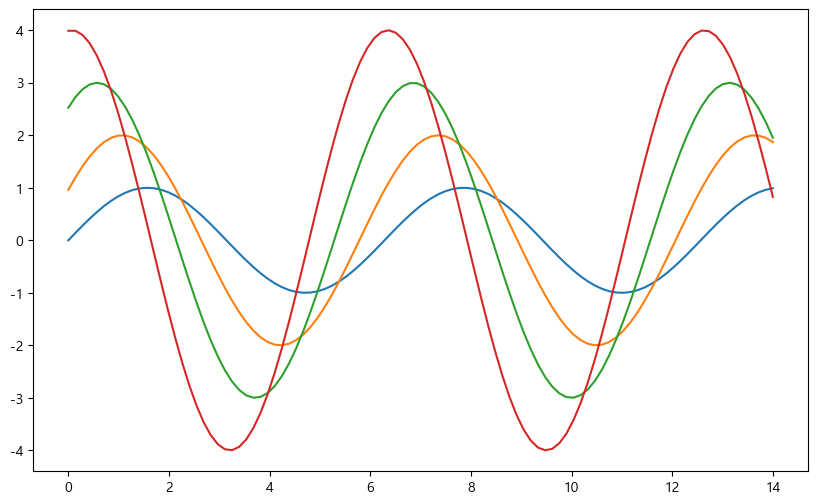

In [75]:
plt.figure(figsize=(10,6))
plt.plot(x,y1,x,y2,x,y3,x,y4)
plt.show()

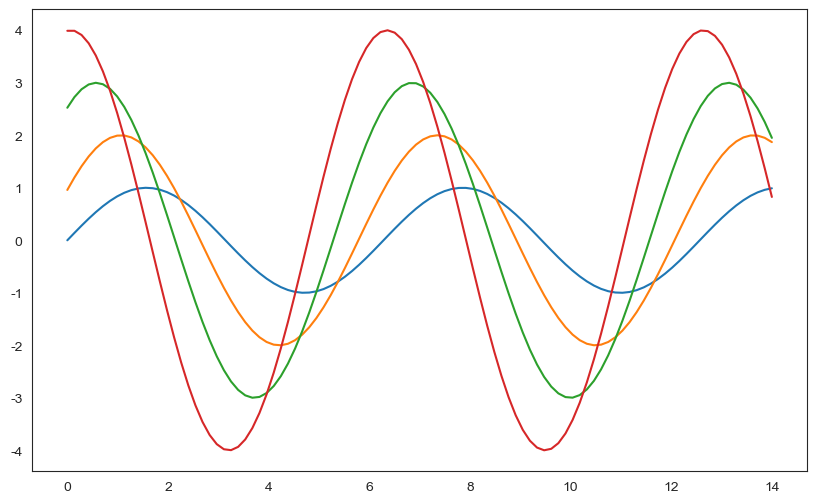

In [76]:
# sns.set_style()
# "white", "whitegrid","dark","darkgrid","sti"
sns.set_style("white")
plt.figure(figsize=(10,6))
plt.plot(x,y1,x,y2,x,y3,x,y4)
plt.show()

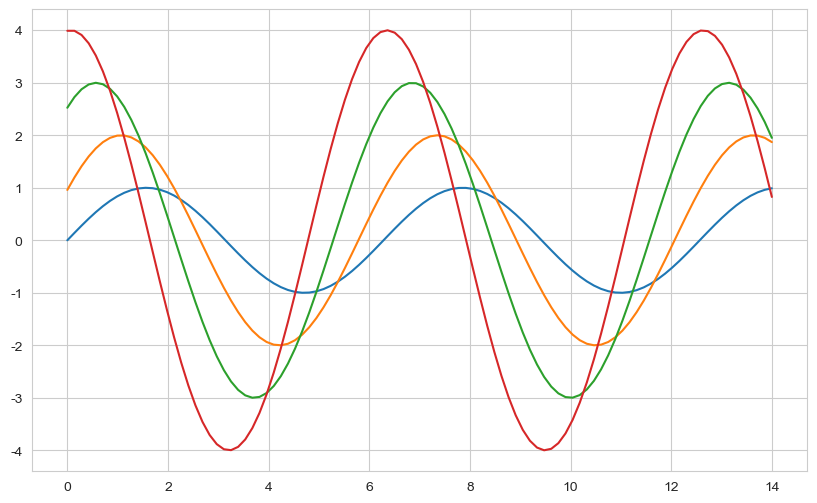

In [77]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
plt.plot(x,y1,x,y2,x,y3,x,y4)
plt.show()

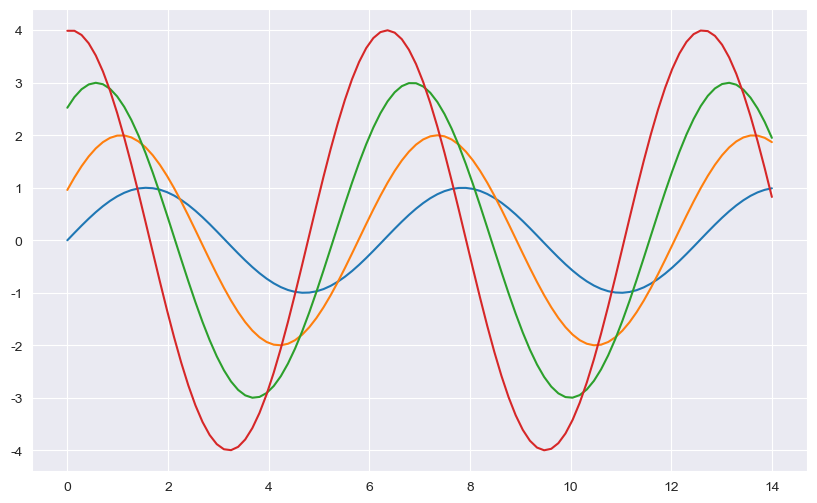

In [78]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
plt.plot(x,y1,x,y2,x,y3,x,y4)
plt.show()

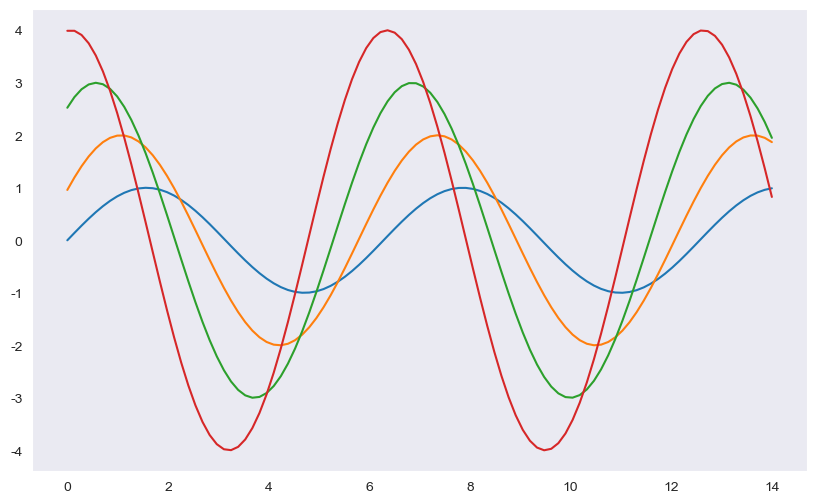

In [79]:
sns.set_style("dark")
plt.figure(figsize=(10,6))
plt.plot(x,y1,x,y2,x,y3,x,y4)
plt.show()

#### 예제2 : seaborn tips data
- boxplot
- swarmplot
- implot

In [80]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [81]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


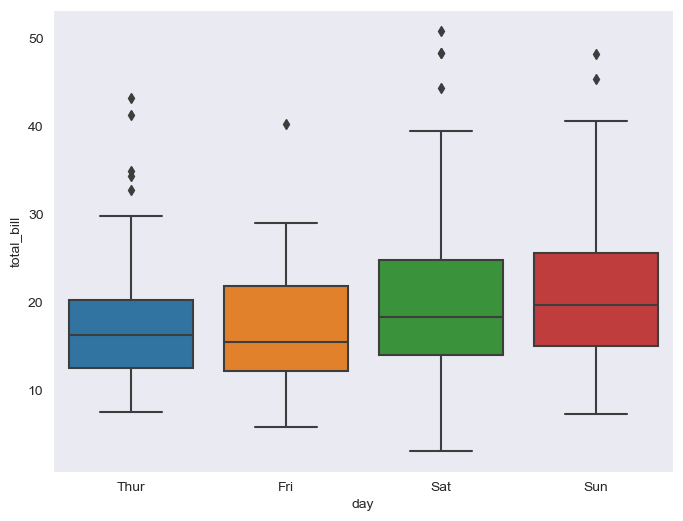

In [82]:
# boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x="day",y="total_bill",data=tips)
plt.show()

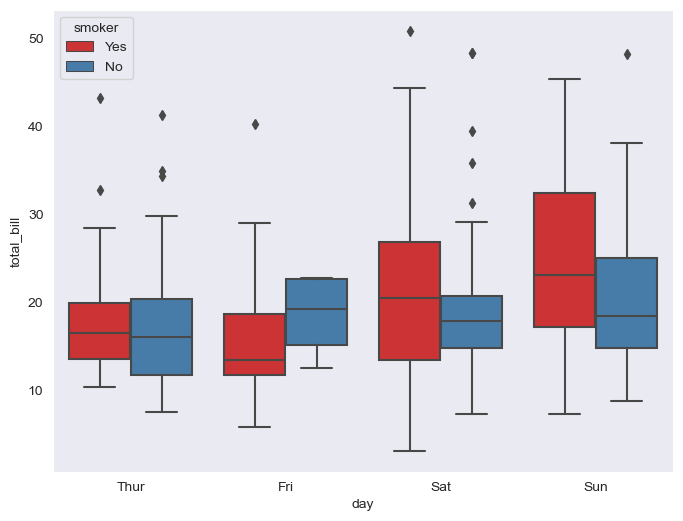

In [83]:
# boxplot hue, palette option
plt.figure(figsize=(8,6))
sns.boxplot(x="day",y="total_bill",data=tips,hue="smoker",palette="Set1")
plt.show()

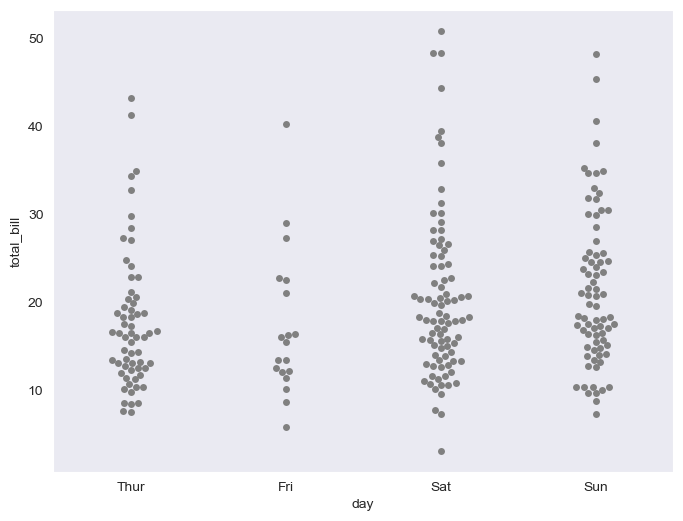

In [84]:
# swarmplot
# color : 0~1 사이 검정색부터 흰색 사이 값을 조절
plt.figure(figsize=(8,6))
sns.swarmplot(x="day",y="total_bill",data=tips,color="0.5")
plt.show()

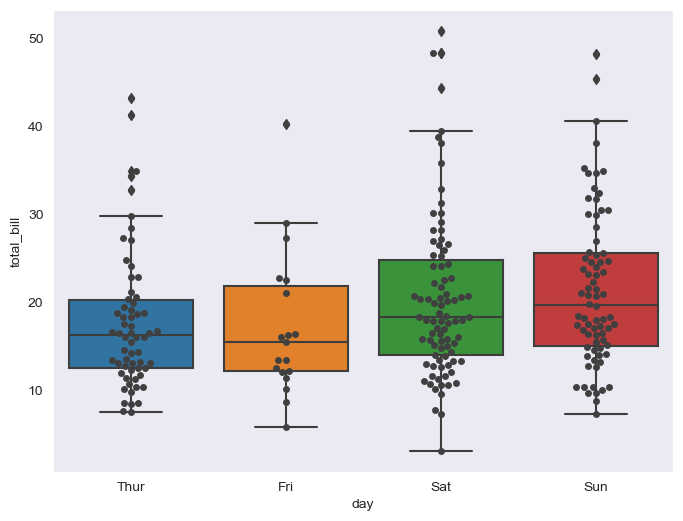

In [85]:
# boxplot with swarmplot

plt.figure(figsize=(8,6))
sns.boxplot(x="day",y="total_bill",data=tips)
sns.swarmplot(x="day",y="total_bill",data=tips,color="0.25")
plt.show()

#### 범죄현황데이터 시각화

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

plt.rcParams["axes.unicode_minus"] = False
rc("font",family="Malgun Gothic")
# matplotlib inline
get_ipython().run_line_magic("matplotlib","inline")

d:\Miniconda\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


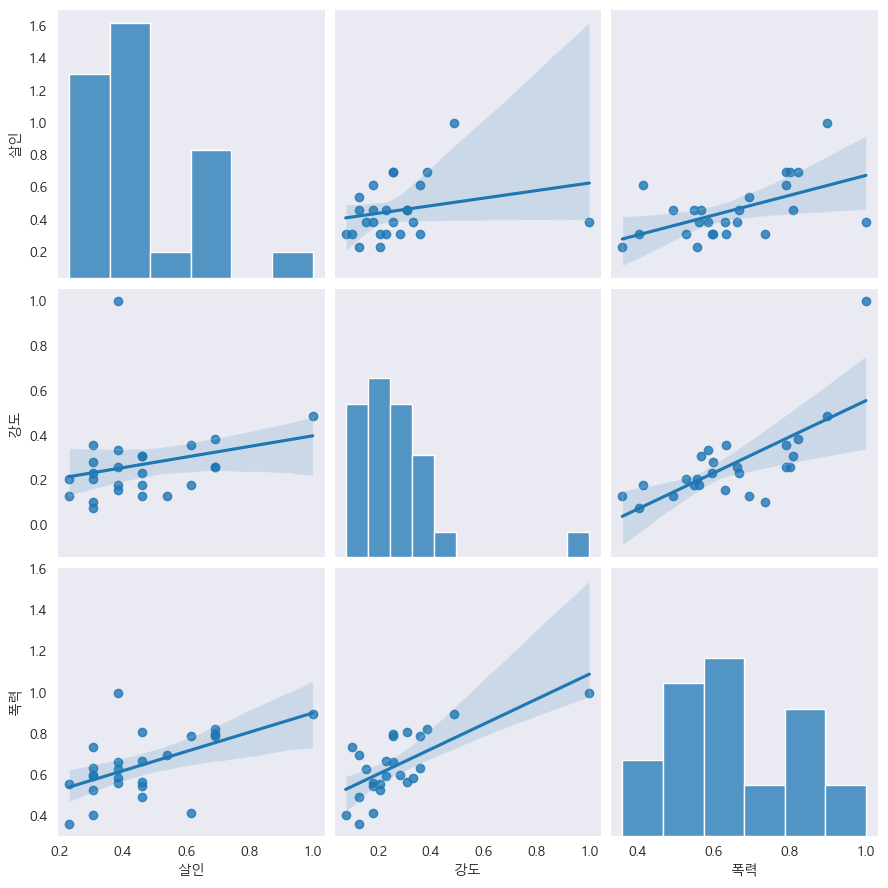

In [87]:
sns.pairplot(data=crime_anal_norm, vars=["살인","강도","폭력"], kind="reg",height=3);

In [88]:
def drawPlot():
    sns.pairplot(
        crime_anal_norm, x_vars=["인구수","CCTV"], y_vars=["살인","강도"], kind="reg",height=4
    )
    plt.show()

d:\Miniconda\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


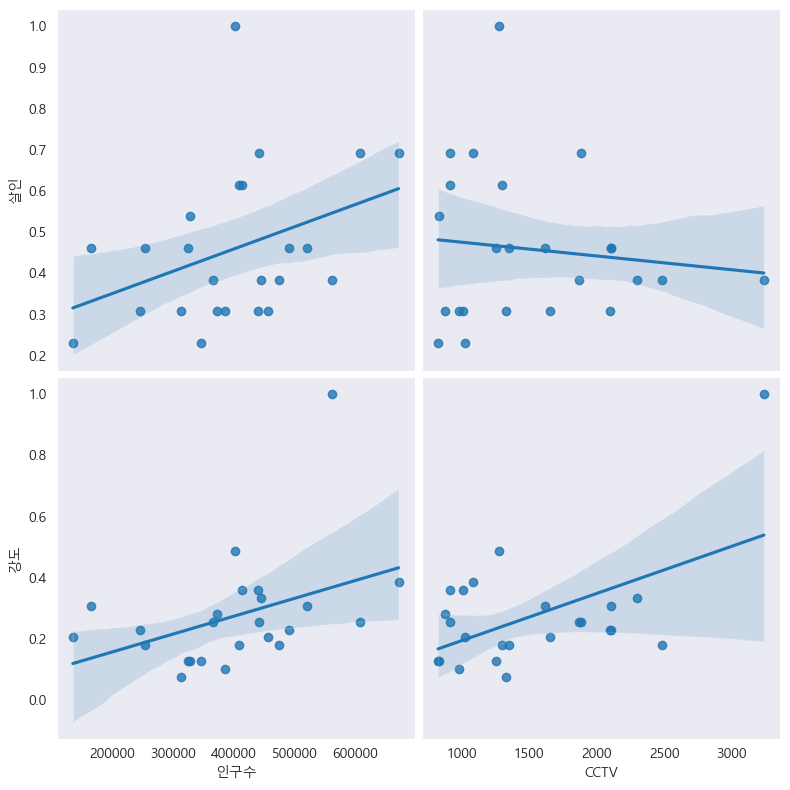

In [89]:
drawPlot()

d:\Miniconda\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


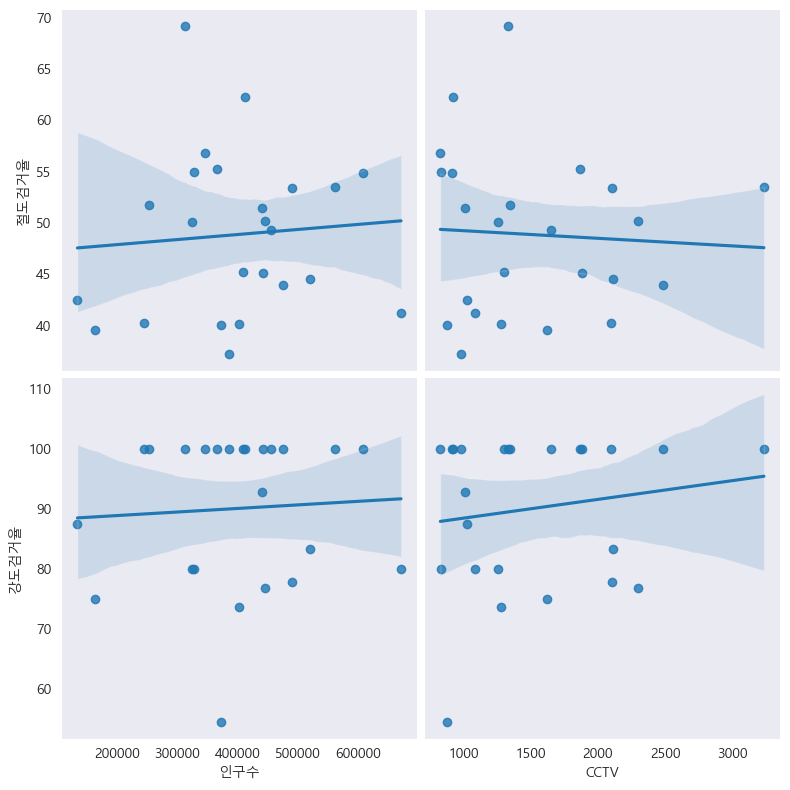

In [90]:
# 인구수, CCTV, 와 절도검거율, 강도 검거율의 상관관계 확인
def drawPlot():
    sns.pairplot(
        data=crime_anal_norm,
        x_vars=["인구수","CCTV"],
        y_vars=["절도검거율","강도검거율"], 
        kind="reg",
        height=4
    )
    plt.show()
drawPlot()

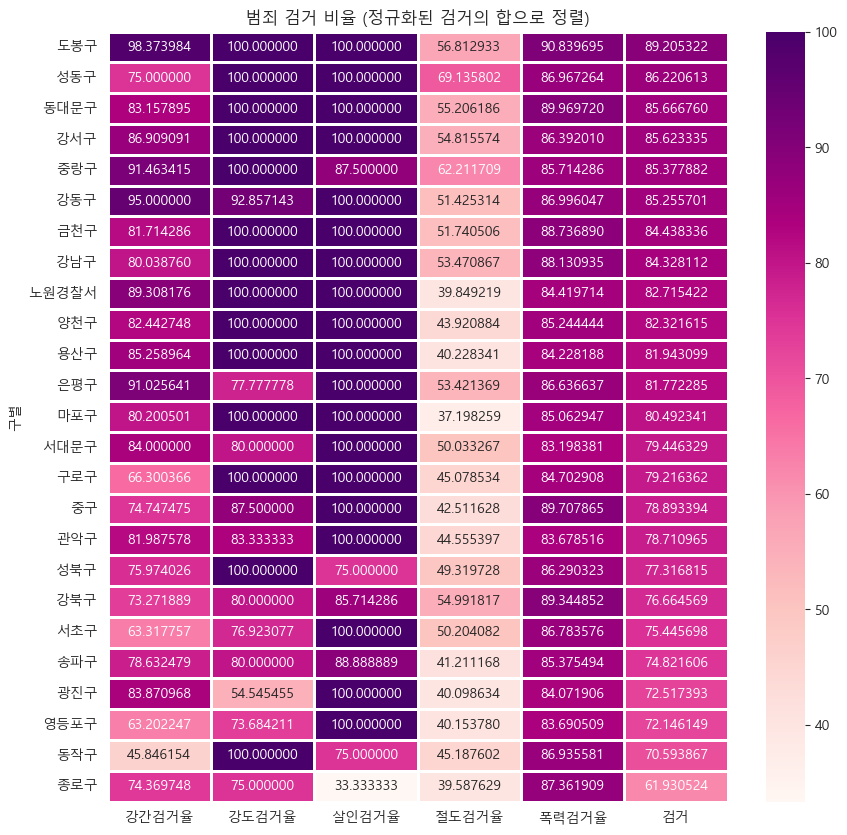

In [91]:
def drawGraph():
    # 데이터 프레임 생성
    target_col = ["강간검거율","강도검거율","살인검거율","절도검거율","폭력검거율","검거"]
    crime_anal_norm_sort = crime_anal_norm.sort_values(by="검거",ascending=False)
    # 그래프 설정
    plt.figure(figsize=(10,10))
    sns.heatmap(
        data=crime_anal_norm_sort[target_col],
        annot=True, # 데이터값 표현
        fmt="f", # d: 정수, f: 실수
        linewidths=2, # 간격설정
        cmap="RdPu"
    )
    plt.title("범죄 검거 비율 (정규화된 검거의 합으로 정렬)")
    plt.show()
drawGraph()

In [92]:
crime_anal_norm.head(1)

,강도,강간,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.0,1.0,0.384615,1.0,1.0,80.03876,100.0,100.0,53.470867,88.130935,561052.0,3238.0,0.876923,84.328112


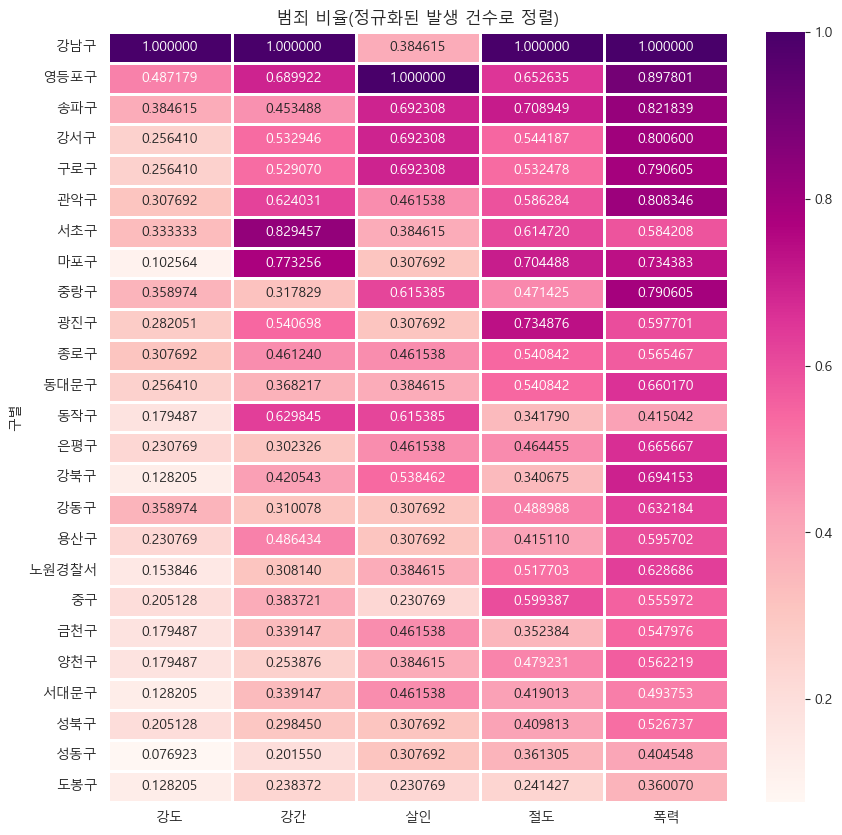

In [93]:
# 범죄발생 건수 heatmap
# 범죄 컬럼을 기준으로 정렬

def drawGraph():
    # 데이터 프레임 생성
    target_col =["강도","강간","살인","절도","폭력"]
    crime_anal_norm_sort = crime_anal_norm.sort_values(by="범죄",ascending=False) # 내림차순

    # 그래프 설정
    plt.figure(figsize=(10,10))
    sns.heatmap(
        data=crime_anal_norm_sort[target_col],
        annot=True, # 데이터값 표현
        fmt="f", # 실수값으로 표현
        linewidths= 2, # 간격설정
        cmap="RdPu",
    )
    plt.title("범죄 비율(정규화된 발생 건수로 정렬)")
    plt.show()
drawGraph()

In [94]:
crime_anal_norm.to_csv("./Crime_data/02. crime_in_Seoul_final.csv",sep=",",encoding="utf-8")

----

folium

In [95]:
# Windows, mac(intel, m1)
# !pip install folium

# Window
# !pip install charset
# !pip install charset-normalizer

In [101]:
conda install -c conda -forge folium


Note: you may need to restart the kernel to use updated packages.


usage: conda-script.py install [-h] [--revision REVISION]
                               [-n ENVIRONMENT | -p PATH] [-c CHANNEL]
                               [--use-local] [--override-channels]
                               [--repodata-fn REPODATA_FNS]
                               [--experimental {jlap,lock}] [--no-lock]
                               [--repodata-use-zst | --no-repodata-use-zst]
                               [--strict-channel-priority]
                               [--no-channel-priority]
                               [--no-deps | --only-deps] [--no-pin] [--copy]
                               [--no-shortcuts]
                               [--shortcuts-only SHORTCUTS_ONLY] [-C] [-k]
                               [--offline] [--json] [-v] [-q] [-d] [-y]
                               [--download-only] [--show-channel-urls]
                               [--file FILE] [--solver {classic,libmamba}]
                               [--force-reinstall]
             

In [108]:
import folium
import pandas as pd
import json

folium.Map()
- location : tuple or list, default None
    - Latitude and Longitude of Map(Northing, Easting)

In [114]:
m = folium.Map(location=[37.511885, 127.102345], zoom_start=12)
m

In [122]:
m = folium.Map(
    location=[37.511885, 127.102345],
    zoom_start=12,
    titles= "OpenStreetMap"
    )
# 잠실역
folium.Marker((37.514634749,127.104260695)).add_to(m)

# 잠실나루역
folium.Marker(
    location=[37.520692129, 127.103820882],
    popup="<b>Subway</b>",
).add_to(m)

# tooltip
folium.Marker(
    location=[37.520692129, 127.103820882],
    popup="<b>Subway</b>",
    tooltip="<i>잠실나루역</i>",
).add_to(m)

# 수서역
folium.Marker(
    location=[37.487320753, 127.101689945],
    popup="<a href='https://etk.srail.kr/main.do' target=_'blink'>수서역(SRT)</a>",
    tooltip="<i>수서역</i>"
).add_to(m)
m


In [123]:
m = folium.Map(
    location=[37.511885, 127.102345],
    zoom_start=14,
    titles= "OpenStreetMap"
    )
# icon basic
folium.Marker((37.514634749,127.104260695),
            icon=folium.Icon(color="black", info="info-sign")
).add_to(m)

# icon icon color
folium.Marker(
    location=[37.520692129, 127.103820882],
    popup="<b>Subway</b>",
    icon=folium.Icon(
        color="red",
        icon_color="blue",
        icon="cloud")
).add_to(m)

# Icon custom
folium.Marker(
    location=[37.520692129, 127.103820882],
    popup="<b>Subway</b>",
    tooltip="<i>Icon custom</i>",
    icon=folium.Icon(
        color="purple",
        icon_color="green",
        icon="android",
        angle=50,
        prefix="fa")
).add_to(m)

# 수서역
folium.Marker(
    location=[37.487320753, 127.101689945],
    popup="<a href='https://etk.srail.kr/main.do' target=_'blink'>수서역(SRT)</a>",
    tooltip="<i>수서역</i>"
).add_to(m)
m


#### 10. 서울시 범죄 현황에 대한 지도 시각화

In [147]:
%pip install folium

%pip install charset
%pip install charset-normalize

Note: you may need to restart the kernel to use updated packages.
  Using cached charset-1.0.1.tar.gz (189 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached chardet-5.2.0-py3-none-any.whl.metadata (3.4 kB)
Using cached chardet-5.2.0-py3-none-any.whl (199 kB)
  Running setup.py clean for charset
Failed to build charset
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [24 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-38
      creating build\lib.win-amd64-cpython-38\charset
      copying charset\cmd.py -> build\lib.win-amd64-cpython-38\charset
      copying charset\__init__.py -> build\lib.win-amd64-cpython-38\charset
      running egg_info
      writing charset.egg-info\PKG-INFO
      writing dependency_links to charset.egg-info\dependency_links.txt
      writing entry points to charset.egg-info\entry_points.txt
      writing requirements to charset.egg-info\requires.txt
      writing top-level names to charset.egg-info\top_level.txt
      reading manifest file 'charset.egg-info\SOURCES.txt'
      reading manifest template 'MANIFEST.in'
      writing manifest file 'charset.egg-info\SOURCES.txt'
      running build_ext
      bui

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement charset-normalize (from versions: none)
ERROR: No matching distribution found for charset-normalize


In [148]:
import folium
import pandas as pd
import json

In [156]:
crime_anal_norm = pd.read_csv(
    "./Crime_data/02. crime_in_Seoul_final.csv", index_col=0, encoding="utf-8"
)

geo_path = "./Crime_data/02. skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path,encoding="utf-8"))
geo_str

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': '강동구',
   'properties': {'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.11519584981606, 37.557533180704915],
      [127.16683184366129, 37.57672487388627],
      [127.18408792330152, 37.55814280369575],
      [127.16530984307447, 37.54221851258693],
      [127.14672806823502, 37.51415680680291],
      [127.12123165719615, 37.52528270089],
      [127.1116764203608, 37.540669955324965],
      [127.11519584981606, 37.557533180704915]]]}},
  {'type': 'Feature',
   'id': '송파구',
   'properties': {'code': '11240',
    'name': '송파구',
    'name_eng': 'Songpa-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.0690698130372, 37.522279423505026],
      [127.10087519791962, 37.524841220167055],
      [127.1116764203608, 37.540669955324965],
      [127.12123165719615, 37.52528270089

In [157]:
crime_anal_norm.tail(2)

,강도,강간,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
중구,0.205128,0.383721,0.230769,0.599387,0.555972,74.747475,87.5,100.0,42.511628,89.707865,134593.0,1023.0,0.394995,78.893394
중랑구,0.358974,0.317829,0.615385,0.471425,0.790605,91.463415,100.0,87.5,62.211709,85.714286,412780.0,916.0,0.510844,85.377882


In [177]:
# 살인발생 건수 지도 시각화
my_map = folium.Map(
    location = [37.5502, 126.982],
    zoom_start = 11,
    tile_layer='Stamen Toner'
)
folium.Choropleth(
    geo_data=geo_str, # 우리나라 경계선 좌표값이 담긴 데이터
    data=crime_anal_norm["살인"],
    columns=[crime_anal_norm.index, crime_anal_norm["살인"]],
    key_on="feature.id",
    fill_color="PuRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="정규화된 살인 발생 건수"
).add_to(my_map)

my_map

In [178]:
# 살인발생 건수 지도 시각화
my_map = folium.Map(
    location = [37.5502, 126.982],
    zoom_start = 11,
    tile_layer='Stamen Toner'
)
folium.Choropleth(
    geo_data=geo_str, # 우리나라 경계선 좌표값이 담긴 데이터
    data=crime_anal_norm["강간"],
    columns=[crime_anal_norm.index, crime_anal_norm["강간"]],
    key_on="feature.id",
    fill_color="PuRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="정규화된 강간 발생 건수"
).add_to(my_map)

my_map

In [180]:
# 살인발생 건수 지도 시각화
my_map = folium.Map(
    location = [37.5502, 126.982],
    zoom_start = 11,
    tile_layer='Stamen Toner'
)
folium.Choropleth(
    geo_data=geo_str, # 우리나라 경계선 좌표값이 담긴 데이터
    data=crime_anal_norm["범죄"],
    columns=[crime_anal_norm.index, crime_anal_norm["살인"]],
    key_on="feature.id",
    fill_color="PuRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="정규화된 5대 범죄 발생 건수"
).add_to(my_map)

my_map

In [181]:
# 살인발생 건수 지도 시각화
tmp_criminal = crime_anal_norm["범죄"] / crime_anal_norm["인구수"]

my_map = folium.Map(
    location = [37.5502, 126.982],
    zoom_start = 11,
    tile_layer='Stamen Toner'
)
folium.Choropleth(
    geo_data=geo_str, # 우리나라 경계선 좌표값이 담긴 데이터
    data=crime_anal_norm["범죄"],
    columns=[crime_anal_norm.index, crime_anal_norm["살인"]],
    key_on="feature.id",
    fill_color="PuRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="인구 대비 범죄 발생 건수"
).add_to(my_map)

my_map

In [182]:
# 경찰서별 정보를 범죄 발생과 함께 정리
crime_anal_station = pd.read_csv(
    "./Crime_data/02. crime_in_Seoul_raw.csv", encoding="utf-8"
)

crime_anal_station.tail(2)

,구분,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,구별,lat,lng
29,중부,96.0,141.0,3.0,3.0,2.0,2.0,485.0,1204.0,1164.0,1335.0,중구,37.563617,126.989652
30,혜화,64.0,101.0,6.0,6.0,2.0,2.0,379.0,988.0,842.0,972.0,종로구,37.571968,126.998957


In [186]:
col = ["강간검거","강도검거","살인검거","절도검거","폭력검거"]
tmp = crime_anal_station[col] / crime_anal_station[col].max()
crime_anal_station["검거"] = np.mean(tmp, axis=1)
crime_anal_station.tail()

,구분,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,구별,lat,lng,검거
26,종로,113.0,137.0,3.0,6.0,0.0,4.0,389.0,952.0,1135.0,1291.0,종로구,37.571824,126.984153,0.238103
27,종암,42.0,51.0,5.0,5.0,1.0,2.0,344.0,680.0,815.0,932.0,성북구,37.603989,127.039937,0.195242
28,중랑,150.0,164.0,14.0,14.0,7.0,8.0,1052.0,1691.0,2712.0,3164.0,중랑구,37.605643,127.076487,0.675873
29,중부,96.0,141.0,3.0,3.0,2.0,2.0,485.0,1204.0,1164.0,1335.0,중구,37.563617,126.989652,0.277182
30,혜화,64.0,101.0,6.0,6.0,2.0,2.0,379.0,988.0,842.0,972.0,종로구,37.571968,126.998957,0.240065


In [187]:
# 경찰서 위치 마커 표시
my_map = folium.Map(
    location=[37.5502, 126.982],zoom_start=11
)

for idx, rows in crime_anal_station.iterrows():
    folium.Marker(
        location=[rows["lat"], rows["lng"]]
    ).add_to(my_map)

my_map

In [192]:
# 검거에 값에 곱한 뒤 원의 넓이 적용
my_map = folium.Map(
    location=[37.5502, 126.982],zoom_start=11
)

folium.Choropleth(
    geo_data=geo_str,
    data=crime_anal_norm["범죄"],
    columns=[crime_anal_norm.index, crime_anal_norm["범죄"]],
    key_on="feature.id",
    fill_color="PuRd",
    fill_opacity=0.7,
    line_opacity=0.2,
).add_to(my_map)

for idx, rows in crime_anal_station.iterrows():
    folium.CircleMarker(
        location=[rows["lat"], rows["lng"]],
        radius=rows["검거"] * 50,
        popup=rows["구분"] + " : " + "%.2f" % rows["검거"],
        color="#3186cc",
        fill=True,
        fill_color="#3186cc"
    ).add_to(my_map)

my_map


#### 11. 서울시 범죄 현황 발생 장소 분석

In [193]:
# 추가 검증
crime_loc_raw = pd.read_csv(
    "./Crime_data/02. crime_in_Seoul_location.csv", thousands=",", encoding="euc-kr"
)
crime_loc_raw.tail(2)

,범죄명,장소,발생건수
63,폭력,금융기관,42
64,폭력,기타,26382


In [194]:
crime_loc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   범죄명     65 non-null     object
 1   장소      65 non-null     object
 2   발생건수    65 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [195]:
crime_loc_raw.범죄명.unique()

array(['살인', '강도', '강간.추행', '절도', '폭력'], dtype=object)

In [196]:
crime_loc_raw["장소"].unique()

array(['아파트, 연립 다세대', '단독주택', '노상', '상점', '숙박업소, 목욕탕', '유흥 접객업소', '사무실',
       '역, 대합실', '교통수단', '유원지 ', '학교', '금융기관', '기타'], dtype=object)

In [200]:
crime_loc = crime_loc_raw.pivot_table(
    crime_loc_raw, index="장소", columns="범죄명", aggfunc=[np.sum]
)
crime_loc.columns = crime_loc.columns.droplevel([0,1])
crime_loc.tail(2)

범죄명,강간.추행,강도,살인,절도,폭력
장소,,,,,
유흥 접객업소,398,13,8,2035,2645
학교,33,0,0,400,203


In [201]:
col = ["살인","강도","강간","절도","폭력"]
crime_loc_norm = crime_loc / crime_loc.max() # 정규화
crime_loc_norm.head()

범죄명,강간.추행,강도,살인,절도,폭력
장소,,,,,
교통수단,0.324718,0.000000,0.000000,0.021027,0.008415
금융기관,0.000940,0.011494,0.015385,0.049738,0.001592
기타,1.000000,0.770115,1.000000,1.000000,1.000000
노상,0.463346,1.000000,0.338462,0.429235,0.929990
단독주택,0.185620,0.172414,0.461538,0.103110,0.135661


In [202]:
crime_loc_norm["종합"] = np.mean(crime_loc_norm, axis=1)
crime_loc_norm.tail(2)

범죄명,강간.추행,강도,살인,절도,폭력,종합
장소,,,,,,
유흥 접객업소,0.187030,0.149425,0.123077,0.093632,0.100258,0.130684
학교,0.015508,0.000000,0.000000,0.018404,0.007695,0.008321


In [205]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

rc("font", family="Malgun Gothic")
%matplotlib inline

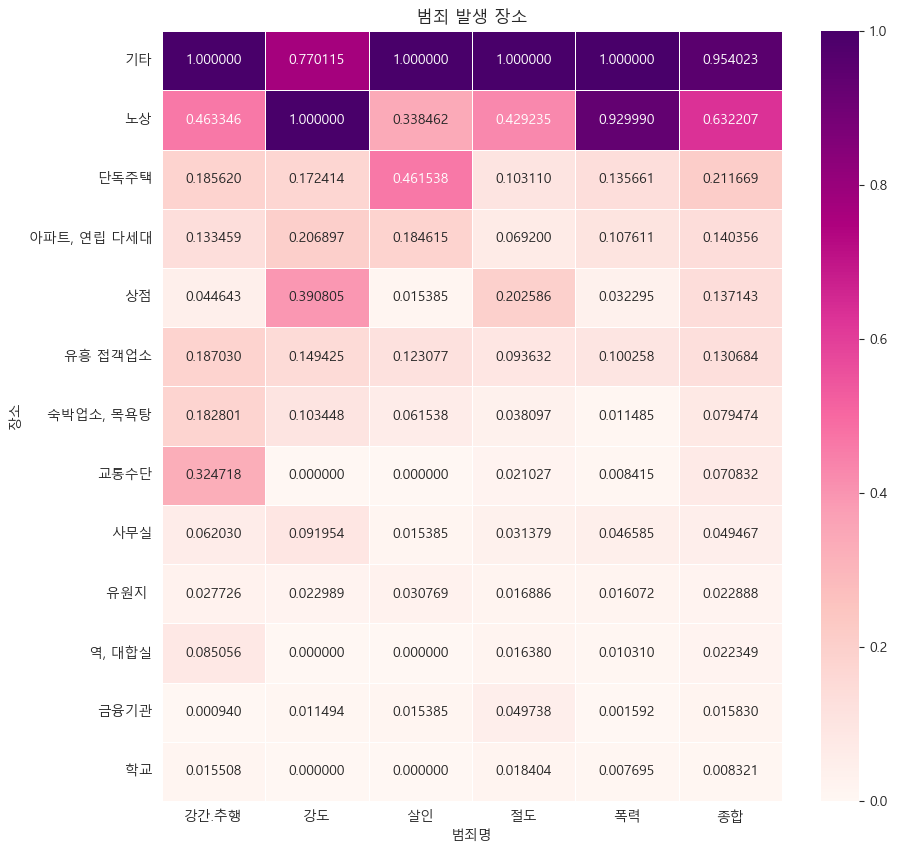

In [208]:
crime_loc_norm_sort = crime_loc_norm.sort_values("종합", ascending=False) # 내림차순

def drawGraph():
    plt.figure(figsize=(10,10))
    sns.heatmap(
        crime_loc_norm_sort,
        annot=True,
        fmt="f",
        linewidths=0.5,
        cmap="RdPu"
    )
    plt.title("범죄 발생 장소")
    plt.show()
drawGraph()